In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NLP_Project/wiki_movie_plots_deduped.csv")
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [ ]:
data.shape

(34886, 8)

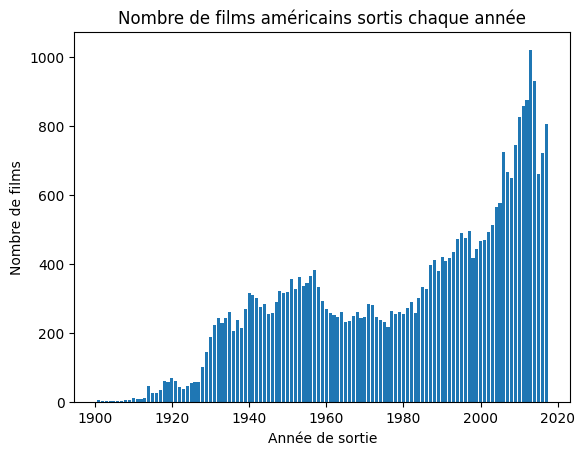

In [ ]:
import matplotlib.pyplot as plt

counts = data['Release Year'].value_counts()

sorted_counts = counts.sort_index()

plt.bar(sorted_counts.index, sorted_counts.values)

plt.title('Nombre de films américains sortis chaque année')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')

plt.show()

Text(-12.430555555555555, 0.5, '')

<Figure size 1000x500 with 0 Axes>

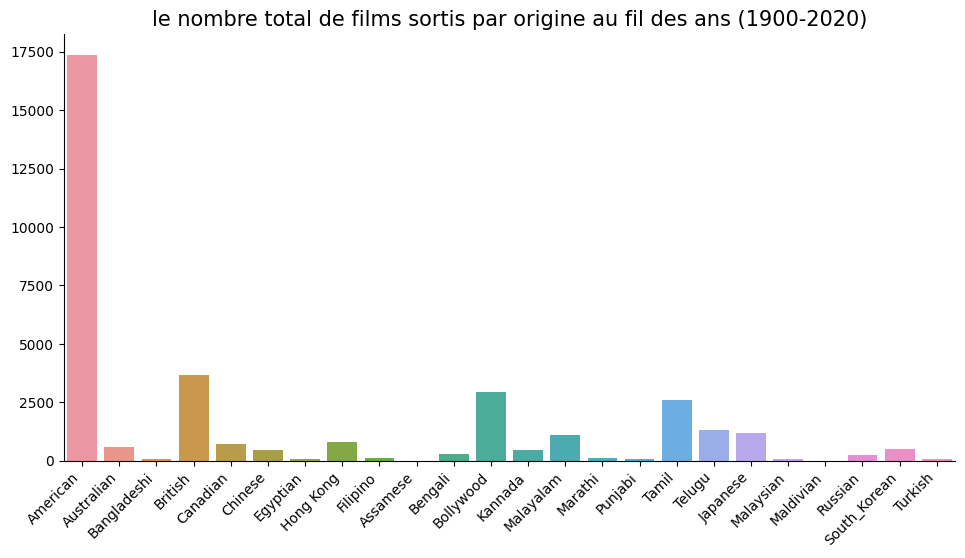

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.catplot(x="Origin/Ethnicity", kind="count", data=data, height=5, aspect=2)
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("le nombre total de films sortis par origine au fil des ans (1900-2020)", fontsize=15)
plt.xlabel("")
plt.ylabel("")

In [ ]:
data2 = data.loc[(data['Origin/Ethnicity']=='American') & (data['Release Year']>2000)]
len(data2)

3595

In [ ]:
my_data = pd.DataFrame(data2)

In [ ]:
finaldata = my_data[["Title", "Plot"]]          
finaldata = finaldata.set_index('Title')    
  
finaldata.head(50)

,Plot
Title,
15 Minutes,Ex-convicts Emil Slovak (Karel Roden) and Oleg...
3000 Miles to Graceland,"Outside of Las Vegas, Michael Zane, a recent p..."
A.I. Artificial Intelligence,"In the late 22nd century, rising sea levels fr..."
The Affair of the Necklace,"Jeanne de Saint-Rémy de Valois, orphaned at an..."
Ali,"The film begins with Cassius Clay, Jr. before ..."
All Over the Guy,All Over the Guy is about Eli (Dan Bucatinsky)...
Along Came a Spider,"After Washington, D.C. detective, forensic psy..."
The Amati Girls,The film centers around an Italian American fa...
America's Sweethearts,Film publicist Lee Phillips is tasked with pro...


In [ ]:
lemmatizer = WordNetLemmatizer() 

def preprocess_sentences(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = nltk.word_tokenize(text)
    my_sent=[lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    finalsent = ' '.join(my_sent)

    finalsent = finalsent.replace("n't", " not")
    finalsent = finalsent.replace("'m", " am")
    finalsent = finalsent.replace("'s", " is")
    finalsent = finalsent.replace("'re", " are")
    finalsent = finalsent.replace("'ll", " will")
    finalsent = finalsent.replace("'ve", " have")
    finalsent = finalsent.replace("'d", " would")
    
    return finalsent

finaldata["new_plot"]= finaldata["Plot"].apply(preprocess_sentences)
finaldata.head()

,Plot,new_plot
Title,,
15 Minutes,Ex-convicts Emil Slovak (Karel Roden) and Oleg...,exconvicts emil slovak karel roden oleg razgul...
3000 Miles to Graceland,"Outside of Las Vegas, Michael Zane, a recent p...",outside la vega michael zane recent parolee st...
A.I. Artificial Intelligence,"In the late 22nd century, rising sea levels fr...",late 22nd century rising sea level global warm...
The Affair of the Necklace,"Jeanne de Saint-Rémy de Valois, orphaned at an...",jeanne de saintrémy de valois orphaned early a...
Ali,"The film begins with Cassius Clay, Jr. before ...",film begin cassius clay jr championship debut ...


In [ ]:
finaldata.to_pickle("processed_data.pkl")

In [ ]:

tfidf = TfidfVectorizer()
tfidf_movieid = tfidf.fit_transform((finaldata["new_plot"]))

# Recherche de similitude cosinus entre les vecteurs
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tfidf_movieid, tfidf_movieid)

In [ ]:
indices = pd.Series(finaldata.index)
def recommendations(title, cosine_sim = similarity):
  try:
    index = indices[indices == title].index[0]
    print(index)
    similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
    print(similarity_scores)
    top_10_movies = list(similarity_scores.iloc[1:11].index)
    print(top_10_movies)
    recommended_movies = [list(finaldata.index)[i] for i in top_10_movies]
    return recommended_movies
  except:
    print("No movie name found")

In [ ]:
recommendations("Harry Potter and the Chamber of Secrets")

281
281     1.000000
80      0.562548
1866    0.494711
2258    0.490071
2063    0.478480
          ...   
2891    0.000000
1394    0.000000
1393    0.000000
192     0.000000
3197    0.000000
Length: 3595, dtype: float64
[80, 1866, 2258, 2063, 1443, 688, 885, 1490, 917, 2502]


["Harry Potter and the Sorcerer's Stone",
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Goblet of Fire',
 'Married Life',
 'Kiss Kiss Bang Bang',
 'Gambit']

In [ ]:
recommendations("Spider-Man")

369
369     1.000000
1560    0.582712
3004    0.508927
771     0.461044
2387    0.425651
          ...   
3445    0.000000
1208    0.000000
2841    0.000000
1099    0.000000
192     0.000000
Length: 3595, dtype: float64
[1560, 3004, 771, 2387, 117, 2558, 2233, 345, 434, 1655]


['Spider-Man 3',
 'The Amazing Spider-Man 2',
 'Spider-Man 2',
 'Amazing Spider-Man, TheThe Amazing Spider-Man',
 ' The Majestic',
 'ParaNorman',
 'Dream House',
 'Return to Never Land',
 'Bringing Down the House',
 'Forgetting Sarah Marshall']

In [ ]:
recommendations("Ice Age")

292
292     1.000000
1177    0.632123
1881    0.539251
2520    0.348114
3331    0.289557
          ...   
192     0.000000
1136    0.000000
2407    0.000000
2741    0.000000
1099    0.000000
Length: 3595, dtype: float64
[1177, 1881, 2520, 3331, 1276, 1112, 1049, 1137, 2990, 2525]


['Ice Age: The Meltdown',
 'Ice Age: Dawn of the Dinosaurs',
 'Ice Age: Continental Drift',
 'Ice Age: Collision Course',
 'Scoop',
 ' East Side Story',
 'Bella',
 'Flushed Away',
 'In the Blood',
 'Joyful Noise']

In [ ]:
recommendations("All Over the Guy")

5
5       1.000000
1786    0.374353
3395    0.365680
511     0.337105
2008    0.327905
          ...   
2741    0.000000
2346    0.000000
1210    0.000000
3445    0.000000
1035    0.000000
Length: 3595, dtype: float64
[1786, 3395, 511, 2008, 540, 889, 1694, 3347, 445, 2491]


[' (500) Days of Summer',
 'iBoy',
 'Just Married',
 'The Book of Eli',
 "My Boss's Daughter",
 'A History of Violence',
 'Made of Honor',
 'The Light Between Oceans',
 'Cheaper by the Dozen',
 'Five-Year Engagement, TheThe Five-Year Engagement']